<center><font size = "10"> Week 2 - Morphologies <center>
<center><font size = "8">Home work<center>

<font size = "3">Please, write your group number and the names and surnames of the group members here
<br>Group number:
<br>Group member1:
<br>Group member2:
<br>Group member3:
    
__IMPORTANT:__<font size = "3"> Exercises in <font color='red'>red</font> are mandatory assignements to be delivered by next Monday before 23:59.

# Optional: Create your favorite neuron
    
<font size ="3">Write code that builds a geometrical model of a neuron with one soma, one axon and two dendrites. Add three branches to the first dendrite. Set different geometrical properties to your morphology (diameter, lenght). Show the resulting model.  

In [32]:
import neurom as nm
import matplotlib.pyplot as plt
from neurom import view
from neuron import h
from hoc2swc import neuron2swc
from neurom.check.runner import CheckRunner
from neurom.view.matplotlib_utils import (
    update_plot_limits,
)

DATA_FOLDER = "./04"
DATA_PATH = "/morph_02.swc"

In [16]:
# Name of the sections
#Soma
soma = h.Section(name='Soma')

#Axon
axon = h.Section(name='Axon')

#Dendrites
main_dendrite = h.Section(name='main_dend')
second_dendrite = h.Section(name='second_dend')

#Branches - First Dendrites
first_branch = h.Section(name='first_branch')
second_branch = h.Section(name='second_branch')
third_branch = h.Section(name='third_branch')

#Branches - Second Dendrites
fourth_branch = h.Section(name='foruth_branch')
fifth_branch = h.Section(name='fifth_branch')
sixth_branch = h.Section(name='sixth_branch')
seventh_branch = h.Section(name='seventh_branch')


# Geometry

#Soma
soma.L = soma.diam = 12

#Axon
axon.L = 200
axon.diam = 7

#Dendrites
main_dendrite.L = 100
main_dendrite.diam = 8
second_dendrite.L = 70
second_dendrite.diam = 4

# Branches - first dendrite
first_branch.L = 50
first_branch.diam = 3
second_branch.L = 50
second_branch.diam = 3
third_branch.L = 50
third_branch.diam = 3

#Branches - second Dendrite
fourth_branch.L = 50
fourth_branch.diam = 3
fifth_branch.L = 50
fifth_branch.diam = 3
sixth_branch.L = 50
sixth_branch.diam = 3
seventh_branch.L = 50
seventh_branch.diam = 3

# Topology

#Axon -> Soma
axon.connect(soma(0))

#Dendrites -> Soma
main_dendrite.connect(soma(1))
second_dendrite.connect(soma(1))

# Branches -> First Dendrites
first_branch.connect(main_dendrite(1))
second_branch.connect(main_dendrite(1))
third_branch.connect(main_dendrite(1))

# Branches -> Second Dendrites
fourth_branch.connect(second_dendrite(1))
fifth_branch.connect(second_dendrite(1))
sixth_branch.connect(second_dendrite(1))
seventh_branch.connect(second_dendrite(1))

# Show topology
h.define_shape()
h.topology()  


|-|       Soma(0-1)
   `|       main_dend(0-1)
     `|       first_branch(0-1)
     `|       second_branch(0-1)
     `|       third_branch(0-1)
   `|       second_dend(0-1)
     `|       foruth_branch(0-1)
     `|       fifth_branch(0-1)
     `|       sixth_branch(0-1)
     `|       seventh_branch(0-1)
 `|       Axon(0-1)



1.0

Wrote cell 0 to my_cell.swc



my_cell.swc:0:warning


TypeError: 'NoneType' object is not subscriptable

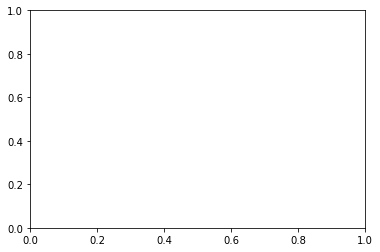

In [17]:
# Visualize in Noto
neuron2swc('my_cell.swc', swap_yz=False)
neuron2 = nm.load_morphology('my_cell.swc')
view.plot_morph(neuron2)

# <font color= 'red'>Ex1:</font> Visualizing neurons

<font size ="3"> Select one of the neurons from your group data set. Write a code that visualize the neuron oriented on the three possible planes (xy, xz and yz), and in 3D, and plot each of its neurites (the neurites only need to be plotted in a single plane). Represent everything in the same plot (subplot). The main title of the figure should be the cell name. The subplots should have also their title (for example: 'plane xy' or 'neurite 2') and the axes of each subplot should be labeled. 
    
    
<font size ="3">Select one of the neurons from your group data set. Write code that generates two plots:
    
    1. Visualize the neuron oriented in the three possible planes (xy, xz, yz). 
    2. Visualize each of the neurites odf your morphoology(in a single plane).

<font size ="3"> For each visualization plot everything in a single plot (use subplots). Make sure to title the figure with cell name and the subplots with respective title (for example: 'plane xy' or 'neurite 2') and the axes of each subplot should be labeled. <font color= 'red'>[1.5 pts]

Loaded neuron : morph_02.swc


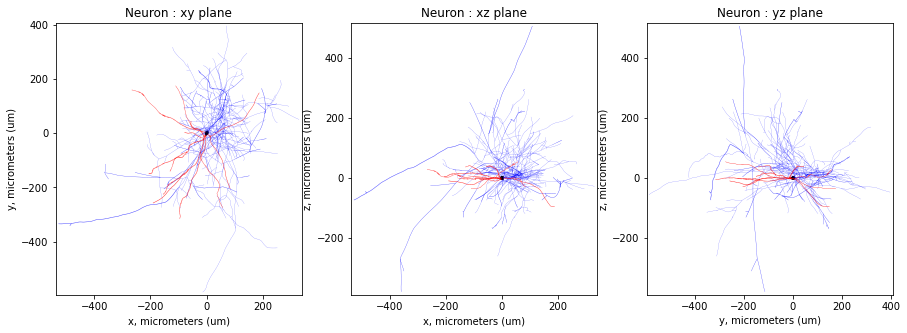

In [33]:
neuron = nm.load_morphology(DATA_FOLDER + DATA_PATH)
print("Loaded neuron : " + neuron.name)

planes = ["xy", "xz", "yz"]

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i in range(len(planes)):
    view.plot_morph(neuron, plane= planes[i], ax=ax[i])
    update_plot_limits(ax[i], white_space=10)  # set your x, y plot limits to match with your neuron

    # the axis handler is returend for further customization
    ax[i].set_title("Neuron : " + str(planes[i]) + " plane")
    ax[i].set_xlabel(str(planes[i][0]) + ", micrometers (um)")
    ax[i].set_ylabel(str(planes[i][1]) + ", micrometers (um)");

# <font color= 'red'>Ex2:</font> Check your set of morphologies for mistakes

<font size = "3">Work with the morphology files that correspond to your group, some of them are good morphology files and some have mistakes. Write down which files have errors, enumerate the errors in each file. You can use or copy here the code on Week2_Morphologies_CheckErrors_tut02.ipynb. Explain, in your own words, what each of these errors means, and give some ideas about how would you correct the mistakes from your bad morphology files. <font color= 'red'>[2 pts]

In [34]:
config = {
    "checks": {
        "morphology_checks": [
            "has_axon",
            "has_basal_dendrite",
            "has_apical_dendrite",
            "has_no_jumps",
            "has_no_fat_ends",
            "has_nonzero_soma_radius",
            "has_all_nonzero_neurite_radii",
            "has_all_nonzero_section_lengths",
            "has_all_nonzero_segment_lengths",
            "has_no_flat_neurites",
            "has_nonzero_soma_radius",
            "has_no_root_node_jumps",
            "has_no_narrow_start",
            "has_no_dangling_branch",
        ]
    },
    "options": {
        "has_nonzero_soma_radius": 0.0,
        "has_all_nonzero_neurite_radii": 0.007,
        "has_all_nonzero_segment_lengths": 0.01,
        "has_all_nonzero_section_lengths": 0.01,
    },
}

In [35]:
check_runner = CheckRunner(config)
results = check_runner.run('./04')

for morph in results["files"]:

    print("Morphology: {} \n".format(morph))

    checks_dict = results["files"][morph]

    # empty strings for our results
    passed = ""
    failed = ""

    # iterate over dictionary's items
    for check_name, status in checks_dict.items():

        # the string with the check's name and status
        string = "\t{0: <50} : {1}\n".format(check_name, status)

        # separate passed from failed checks
        if status is True:
            passed += string  # concatenates to the current passed string

        else:
            failed += string  # concatenats to the current failed string

    print(passed)
    print(failed)

                Has apical dendrite FAIL
                       Has no jumps FAIL
                    Has no fat ends FAIL
             Has no root node jumps FAIL
             Has no dangling branch FAIL
                                ALL FAIL
             Has no root node jumps FAIL
                                ALL FAIL

04/morph_06.swc:902:warning

04/morph_06.swc:903:warning
                Has apical dendrite FAIL
                       Has no jumps FAIL
      Has all nonzero neurite radii FAIL
             Has no root node jumps FAIL
             Has no dangling branch FAIL
                                ALL FAIL
             Has no root node jumps FAIL
                                ALL FAIL
                Has apical dendrite FAIL
             Has no root node jumps FAIL
                                ALL FAIL
                Has apical dendrite FAIL
                       Has no jumps FAIL
             Has no root node jumps FAIL
                                ALL FAIL

Morphology: 04/morph_09.swc 

	Has axon                                           : True
	Has basal dendrite                                 : True
	Has nonzero soma radius                            : True
	Has all nonzero neurite radii                      : True
	Has all nonzero section lengths                    : True
	Has all nonzero segment lengths                    : True
	Has no flat neurites                               : True
	Has no narrow start                                : True

	Has apical dendrite                                : False
	Has no jumps                                       : False
	Has no fat ends                                    : False
	Has no root node jumps                             : False
	Has no dangling branch                             : False
	ALL                                                : False

Morphology: 04/morph_08.swc 

	Has axon                                           : True
	Has basal dendrite                            

**Discussion:** Out of our ten neurons, only 1 show no sign of morphological defect, while the remaining 9 neurons have all defects. In that sense, We will use the morphology file  *"04/morph_07.sw"* for the next exercise. The most comon defects are the presence of a jump. Other defects are the absence of apical dendrite, axon, or dangling branch, and the presence of zero radius in file *06*.

# <font color= 'red'>Ex3:</font> Morphometrics

<font size = "3">Now that you know which cells, out of your set of cells, are morphologically correct its time to analyze some characteristics of them. 

<font size = "3">Compute some morphometric characteristics of all the cells in your cell set that have no mistakes. Find the morphometric charachteristics that best enable you to classify the cells into different groups, such as:

    section_lengths, soma_volume, neurite_volume_density, ...

Plot the results for each metric in a histogram. Do you see any differences? If yes, explain them. Would using a combination of morphometric characteristics improve the classification?  <font color= 'red'>[2.5 pts]

In [44]:
# Morphology to plot:
good_morph = DATA_FOLDER + "/morph_07.swc"
small_bad_morph = DATA_FOLDER + "/morph_04.swc"
big_bad_morph = DATA_FOLDER + "/morph_09.swc"

neurons_to_plot = [good_morph, small_bad_morph, big_bad_morph]

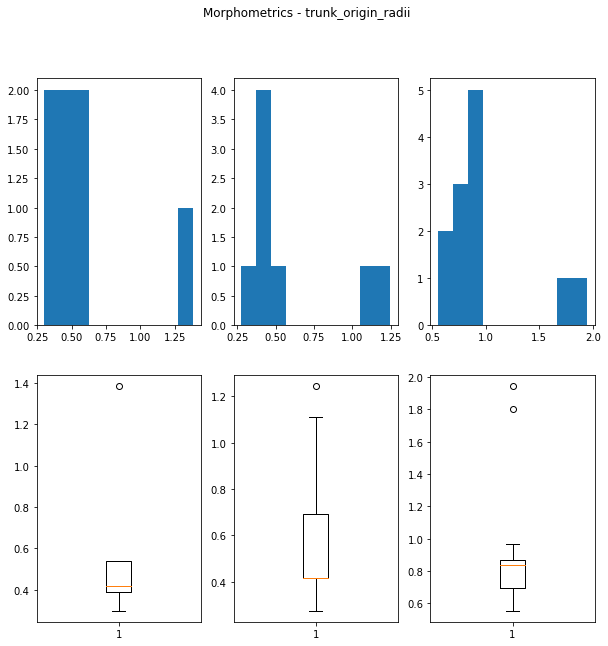

In [62]:
# features to compare: 'trunk_origin_elevations', 'neurite_volume_density', 'total_length_per_neurite', 'section_lengths'
feature = 'trunk_origin_radii' 

fig = plt.figure(figsize=(10,10))
fig.suptitle('Morphometrics - ' + feature)

for i in range(3) :
    tmp_neuron = nm.load_morphology(neurons_to_plot[i])
    values = nm.get(feature, tmp_neuron)
    
    ax1 = fig.add_subplot(2,3,i+1)
    ax1.hist(values)
    
    ax2 = fig.add_subplot(2,3,i+4)
    ax2.boxplot(values)

**Discussion:** The easiest way of classifying the different cells of the set is to choose morphometrics characteristics with high contrast of values and with a small standard deviation of the distribution. For example, we see that the morphometric characteristic **neurite_volume_density** enables to differentiate the good cell with the ones with mistake, because of the distribution of values. Another example is the **section_length**. In fact, the good morphology shows values under a 100 whereas bad morphology have values in the 100 - 200 range. 

Yet, it could be easier to use several morphometric characteristics concomitantly to help classification. By this way, we could target more precisely the neuron type. 

<font size = "3">__IMPORTANT:__ as we have seen in the lecture, neurons have very different shapes. Some of them may even missed some parts that other neurons have, but this doesn't mean that their reconstruction is wrong. 

<font size = "3">Use the information given on the following papers to help you answer Ex2 and Ex3.

<font size = "3">[paper 1](https://www.nature.com/articles/nrn1519.pdf) 
    
<font size = "3">[paper 2](https://www.nature.com/articles/nrn2402.pdf)
    
<font size = "3">[paper 3](https://academic.oup.com/cercor/article/29/4/1719/5304727)